<a href="https://colab.research.google.com/github/MithunSR/Gradient_Descent_Tutorial/blob/main/Introduction__Gradient_descent__Logistic_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction To Gradient Descent

Gradient descent is an optimization algorithm commonly used in machine learning and deep learning for finding the optimal values of parameters in a model. It is particularly effective in solving problems related to minimizing a cost or loss function.

**Gradient is the vector of partial derivatives**

One approach to maximizing a function is to
- pick a random starting point, 
- compute the gradient, 
- take a small step in the direction of the gradient, and 
- repeat with a new staring point.


##Formula

To update the parameters using gradient descent, we use the formula:

$\theta := \theta - \alpha \cdot \nabla J(\theta)$

Where:
- $\theta$ represents the parameters (weights) of the model.
- $\alpha$ denotes the learning rate, which controls the step size of the parameter updates.
- $\nabla J(\theta)$ is the gradient of the cost or loss function $J(\theta)$ with respect to the parameters $\theta$.

##Intuition

  Gradient descent works by iteratively updating the parameters in the opposite direction of the gradient. The gradient points in the direction of steepest ascent, so by subtracting the gradient multiplied by the learning rate, we move in the direction of steepest descent, aiming to reach the minimum of the cost function.

The process involves the following steps:

Initialize the parameters (θ) of the model with random or predefined values.
Calculate the gradient of the cost function (∇J(θ)) with respect to the parameters.
Update the parameters (θ) by subtracting the gradient multiplied by the learning rate.
Repeat steps 2 and 3 until convergence or a maximum number of iterations is reached.
By iteratively updating the parameters based on the gradient, gradient descent gradually approaches the minimum of the cost function, optimizing the model's performance.

#Applying Gradient Descent to Optimize the Parameters of a Logistic Regression Model
In this code example, we will demonstrate how to apply gradient descent to optimize the parameters of a logistic regression model. Logistic regression is a popular machine learning algorithm used for binary classification tasks.

##Load and Preprocess the Data
First, we load the dataset that we will use for training our logistic regression model. In this example, we are using the Breast Cancer Wisconsin (Diagnostic) dataset from scikit-learn. We split the dataset into input features X and target labels y

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [42]:
# Step 1: Load and preprocess the data
data = load_breast_cancer()
X = data.data
y = data.target

In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Define the Logistic Regression Model
Next, we define the LogisticRegression class, which encapsulates our logistic regression model. This class contains methods for computing the sigmoid function, making predictions, and fitting the model using gradient descent.

The sigmoid method computes the sigmoid function, which maps any real-valued number to a value between 0 and 1. It is used to convert the linear regression output to a probability.

The predict method predicts the binary class labels based on the computed probabilities. If the model has not been trained yet (weights are not set), an exception is raised.

The fit method performs the training of the logistic regression model using gradient descent. It initializes the weights to zeros and iteratively updates them based on the gradient of the cost function. The cost history is stored for analysis.

The cost_function method computes the cost function, which measures the discrepancy between the predicted probabilities and the actual labels. It uses the log loss function for binary classification.

In [44]:
class LogisticRegression:
    def __init__(self):
        self.weights = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict(self, X):
        if self.weights is None:
            raise Exception("Model not trained yet. Please call `fit` method first.")
        return np.round(self.sigmoid(X.dot(self.weights)))

    def fit(self, X, y, learning_rate=0.01, num_iterations=1000):
        # Initialize weights
        self.weights = np.zeros(X.shape[1])

        # Perform gradient descent
        cost_history = []
        for iteration in range(num_iterations):
            scores = X.dot(self.weights)
            predictions = self.sigmoid(scores)
            gradient = X.T.dot(predictions - y)
            self.weights -= learning_rate * gradient

            # Compute and store the cost
            cost = self.cost_function(y, predictions)
            cost_history.append(cost)

        return cost_history

    def cost_function(self, y, predictions):
        return -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

##Training the Logistic Regression Model
In this step, we create an instance of the LogisticRegression class and fit the model using the training data. We specify the learning rate and the number of iterations for gradient descent.

In [45]:
logreg = LogisticRegression()

# Train the model using gradient descent
cost_history = logreg.fit(X_train, y_train, learning_rate=0.0001, num_iterations=5000)

<ipython-input-44-f64a640d45b3>:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-44-f64a640d45b3>:32: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
<ipython-input-44-f64a640d45b3>:32: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))


##Make predictions on the test set
We call the predict method of logreg to make predictions on the test set (X_test). The predicted labels are stored in y_pred.

In [48]:
y_pred = logreg.predict(X_test)

<ipython-input-44-f64a640d45b3>:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


##Evaluate the model
We calculate the accuracy of the model by comparing the predicted labels (y_pred) with the actual labels (y_test). The accuracy is the fraction of correct predictions.

In [49]:
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy) 

Accuracy: 0.9473684210526315


##Visualize the predicted classes
We create a scatter plot using matplotlib.pyplot to visualize the predicted classes on the test set. Each point represents an instance with feature values from X_test, and the color represents the predicted class label (y_pred). This visualization helps us understand how well the model separates the classes based on the two selected features (Feature 1 and Feature 2).

Please note that this code provides a simplified implementation of logistic regression for educational purposes and may not include advanced techniques or optimizations.

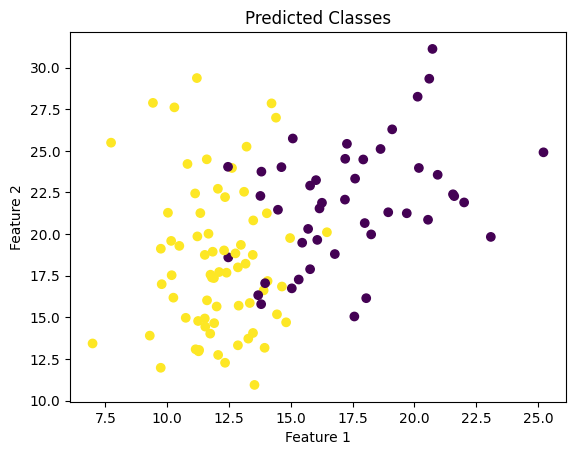

In [50]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Predicted Classes')
plt.show()
